### In this assignment, the aim was to take a total of 300 pictures, with 100 for each of three objects: the spoon, fork, and knife. The purpose could vary, from creating a photo collection to analyzing products or developing an object recognition algorithm. Regardless of the motivation, the photographer had to focus on each item, capturing 100 shots for each. By carefully considering factors like lighting and composition, the final images were expected to highlight the details and features of each utensil, such as etched designs on the handle or the curves of the spoon's bowl.

### 1) Take at least 100 images per class with at least 3 classes using your phone/camera (e.g. take photos of different types of trees, flowers or animals). Display 5 examples from each class. [10 points]

In [1]:
import tensorflow as tf
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense ,BatchNormalization

In [3]:
# Uploading the dataset
import zipfile
zip_ref = zipfile.ZipFile("DATASET.zip", "r")
zip_ref.extractall()
zip_ref.close()

### 2)  Split the images into a training set, a validation set, and a test set. [5 points]

In [4]:
# Dividing the dataset into training, testing, and validation sets.
train_dir = "/content/DATASET/Train"
test_dir = "/content/DATASET/Test"
val_dir='/content/DATASET/Validation'

In [5]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = sorted([item.name for item in data_dir.glob('*') if item.is_dir()])

# Eliminate the '.DS_Store' entry from the array of class names, if it exists.
class_names = [name for name in class_names if name != '.DS_Store']

class_names = np.array(class_names)
print(class_names)


['Fork' 'Knife' 'Spoon']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_folder):
  fig, axs = plt.subplots(1, 5, figsize=(20, 4))
  for i in range(5):
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    axs[i].imshow(img)
     


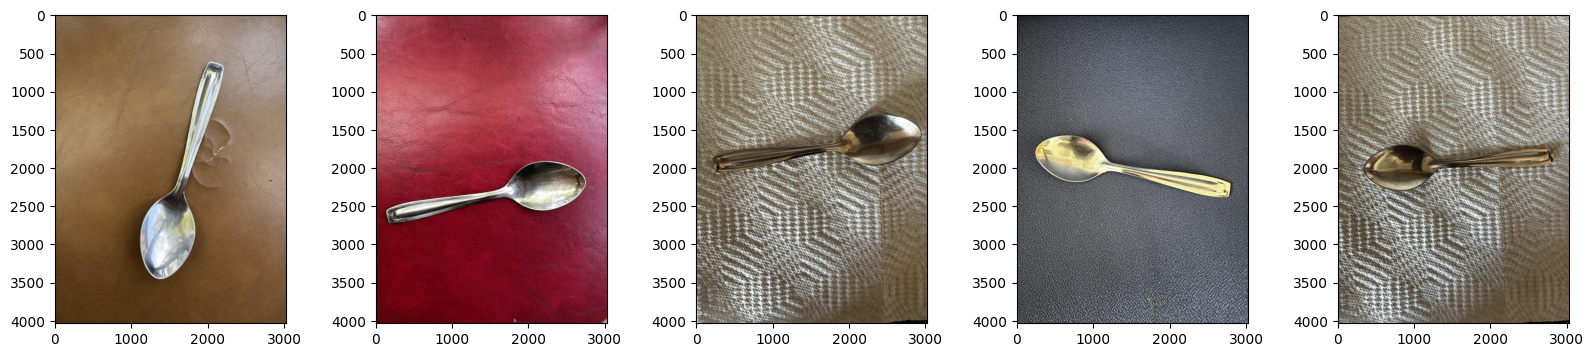

In [7]:
view_random_image("DATASET/Train/Spoon") 

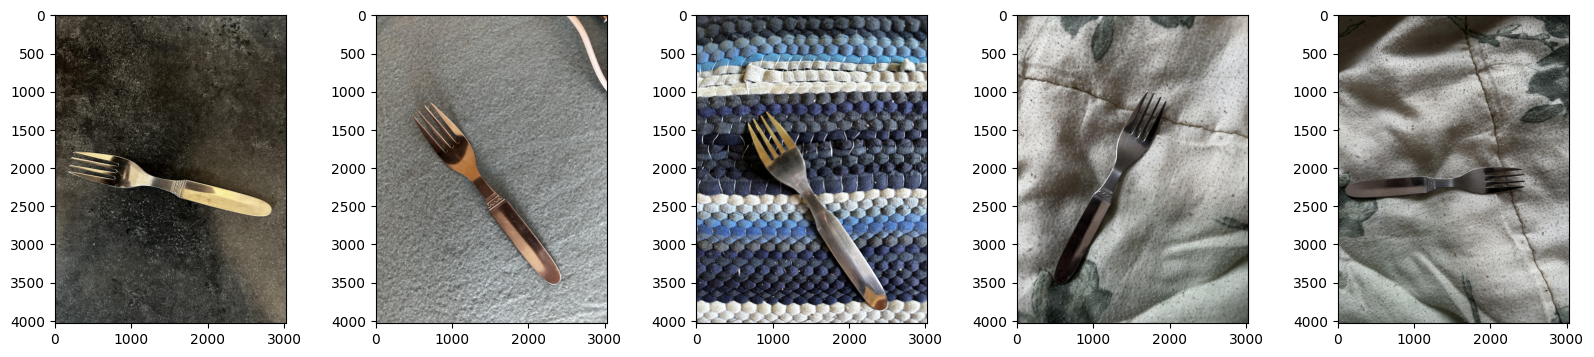

In [8]:
view_random_image("DATASET/Train/Fork") 

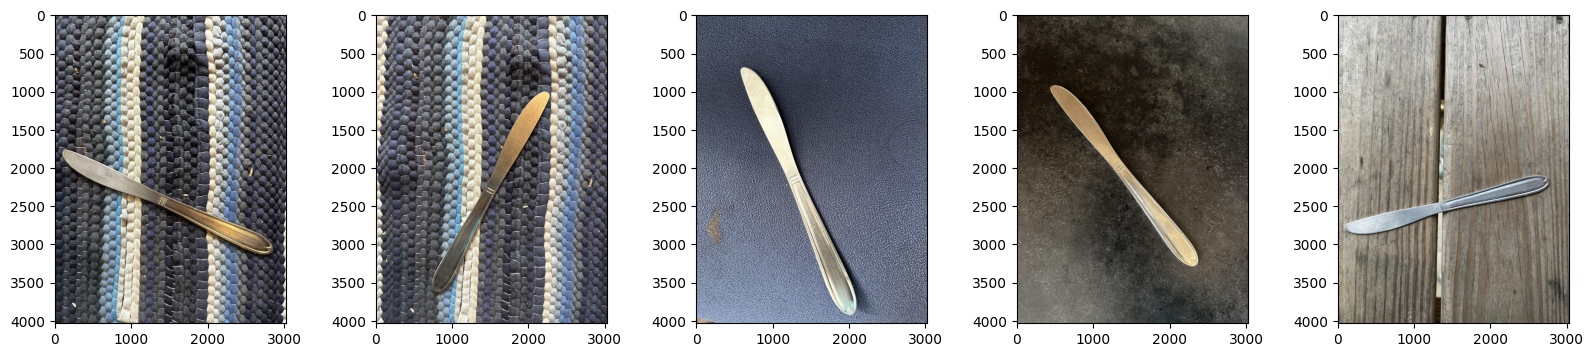

In [9]:
view_random_image("DATASET/Train/Knife") 

### 3) Build the input pipeline, including the appropriate preprocessing operations, and add data augmentation. [10 points]

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

train_data = train_datagen.flow_from_directory(train_dir,target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

valid_data = valid_datagen.flow_from_directory(val_dir,target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = valid_datagen.flow_from_directory(test_dir,target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 180 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


### 5) Train from scratch (without pretraining) a deep neural network that contains convolutional layers on this dataset (the one you created in part 3). Report classification accuracy and give a few examples of correct/incorrect classification (show a few images that were correctly/incorrectly classified). Note: The objective of this question is to illustrate that training deep networks from scratch requires a lot of data so it is ok if your classification accuracy is low. [15 points]

In [11]:
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  BatchNormalization(),
  Conv2D(20, 3, activation='relu'),
  BatchNormalization(),
  MaxPool2D(),
  Conv2D(30, 3, activation='relu',kernel_regularizer=regularizers.l2(0.1)),
  BatchNormalization(),
  Conv2D(10, 3, activation='relu',kernel_regularizer=regularizers.l2(0.1)),
  BatchNormalization(),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax') 
])


model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/50
6/6 [==============================] - 58s 8s/step - loss: 9.6282 - accuracy: 0.3556 - val_loss: 5.1667 - val_accuracy: 0.2833
Epoch 2/50
6/6 [==============================] - 43s 7s/step - loss: 8.3743 - accuracy: 0.2944 - val_loss: 4.9965 - val_accuracy: 0.4167
Epoch 3/50
6/6 [==============================] - 46s 8s/step - loss: 7.1327 - accuracy: 0.3444 - val_loss: 5.0943 - val_accuracy: 0.3500
Epoch 4/50
6/6 [==============================] - 41s 8s/step - loss: 6.7809 - accuracy: 0.5167 - val_loss: 5.0043 - val_accuracy: 0.4167
Epoch 5/50
6/6 [==============================] - 43s 7s/step - loss: 6.5780 - accuracy: 0.4778 - val_loss: 5.2947 - val_accuracy: 0.3667
Epoch 6/50
6/6 [==============================] - 44s 7s/step - loss: 5.9312 - accuracy: 0.4889 - val_loss: 4.9064 - val_accuracy: 0.3167
Epoch 7/50
6/6 [==============================] - 42s 7s/step - loss: 6.1803 - accuracy: 0.4944 - val_loss: 5.1015 - val_accuracy: 0.3333
Epoch 8/50
6/6 [==================

- Furnish the classification accuracy and exemplify it through instances of both accurate and inaccurate categorizations, featuring images that were correctly and incorrectly classified.

In [3]:
model_1.evaluate(test_data)

2/2 [==============================] - 10s 4s/step - loss: 5.2751 - accuracy: 0.3333
[5.275076389312744, 0.3333333432674408]


#### The accuracy of the classification model, following the training from scratch (without pretraining), was evaluated on the dataset created in part c.

1/1 [==============================] - 0s 21ms/step


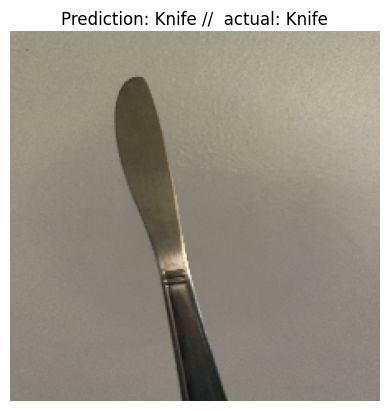

In [37]:
pred_and_plot(model_1, 'DATASET/Test/Knife/IMG_2284.jpg', class_names)

1/1 [==============================] - 0s 24ms/step


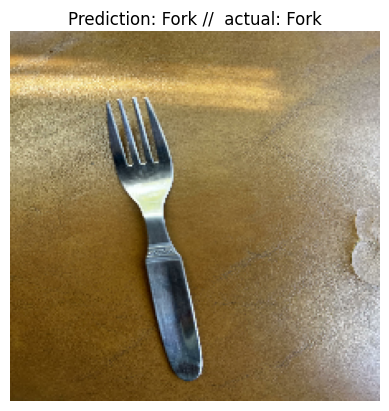

In [38]:
pred_and_plot(model_1, 'DATASET/Test/Fork/IMG_2326.jpg', class_names)

1/1 [==============================] - 0s 29ms/step


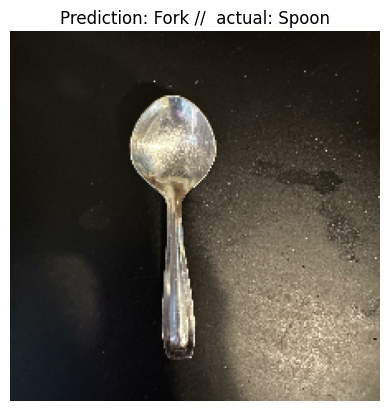

In [39]:
pred_and_plot(model_1, 'DATASET/Test/Spoon/IMG_0159.jpg', class_names)

####  In the given scenario, the deep neural network, equipped with convolution layers but lacking a pre-trained classifier for Fork and Knife, erroneously classified Spoon as Fork, representing an inaccurate categorization.

### 4) Fine-tune a pretrained model of your choice on this dataset (the one you created in part 3). Report classification accuracy and give a few examples of correct/incorrect classification (show a few images that were correctly/incorrectly classified). [10 points]

In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow import keras as K
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = K.models.Sequential()
model.add(resnet)
model.add(K.layers.Conv2D(30, 3, activation='relu'))
model.add(K.layers.MaxPool2D())
model.add(K.layers.Flatten())
model.add(K.layers.Dense(3, activation='softmax'))


for layer in model.layers[:-1]:
    layer.trainable = False

model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_resnet =  model.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


94765736/94765736 [==============================] - 4s 0us/step
Epoch 1/50
6/6 [==============================] - 53s 8s/step - loss: 1.1004 - accuracy: 0.4000 - val_loss: 1.1106 - val_accuracy: 0.4000
Epoch 2/50
6/6 [==============================] - 43s 8s/step - loss: 1.0971 - accuracy: 0.4000 - val_loss: 1.1335 - val_accuracy: 0.3167
Epoch 3/50
6/6 [==============================] - 43s 7s/step - loss: 1.1053 - accuracy: 0.3222 - val_loss: 1.0875 - val_accuracy: 0.4000
Epoch 4/50
6/6 [==============================] - 41s 7s/step - loss: 1.0932 - accuracy: 0.3611 - val_loss: 1.1313 - val_accuracy: 0.2667
Epoch 5/50
6/6 [==============================] - 42s 7s/step - loss: 1.0924 - accuracy: 0.3722 - val_loss: 1.1080 - val_accuracy: 0.4000
Epoch 6/50
6/6 [==============================] - 41s 7s/step - loss: 1.0907 - accuracy: 0.3500 - val_loss: 1.1267 - val_accuracy: 0.2833
Epoch 7/50
6/6 [==============================] - 41s 7s/step - loss: 1.0815 - accuracy: 0.3611 - val_loss:

In [13]:
model.evaluate(test_data)

2/2 [==============================] - 9s 4s/step - loss: 1.1255 - accuracy: 0.3667


[1.1254570484161377, 0.36666667461395264]

#### The accuracy of the model, following the fine-tuning of a pre-trained model chosen for this dataset (created in part c), is 36.67%.

### Evaluate and report the classification accuracy, providing instances of both correct and incorrect classifications, accompanied by images that depict these outcomes.

In [17]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size = [img_shape, img_shape])
    img = img/255.
    return img

def pred_and_plot(model, filename, class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[int(tf.round(pred)[0][0])]
    plt.imshow(img)
    if("Spoon" in filename):
        actual='Spoon'
    elif('Fork' in filename):
        actual='Fork'
    else:
        actual='Knife'
    plt.title(f"Prediction: {pred_class} //  actual: {actual}")
    plt.axis(False);

1/1 [==============================] - 0s 23ms/step


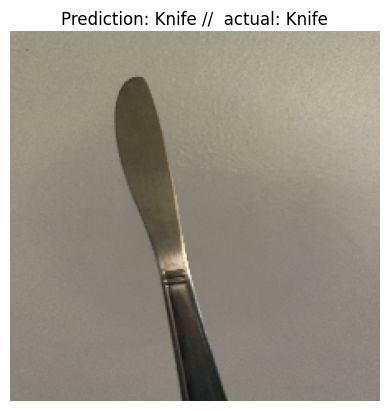

In [40]:
pred_and_plot(model, 'DATASET/Test/Knife/IMG_2284.jpg', class_names)

1/1 [==============================] - 0s 26ms/step


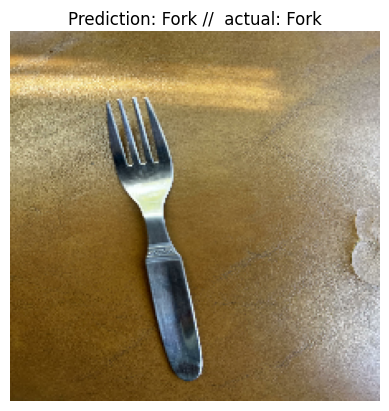

In [41]:
pred_and_plot(model, 'DATASET/Test/Fork/IMG_2326.jpg', class_names)

1/1 [==============================] - 0s 20ms/step


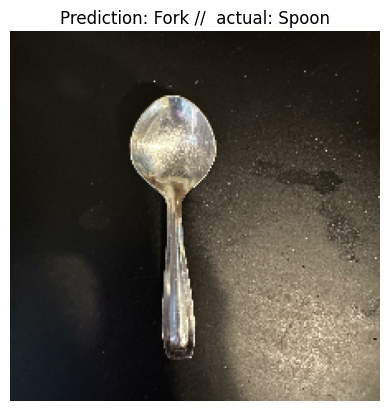

In [42]:
pred_and_plot(model, 'DATASET/Test/Spoon/IMG_0159.jpg', class_names)

#### Based on the fine-tuned and pretrained model selected for this dataset (created in part c), the classification results indicate accurate identification of Fork and Knife, while an incorrect classification occurred for Spoon, which was misclassified as Fork.